In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix ,accuracy_score, classification_report 
from sklearn import datasets

In [2]:
data=datasets.load_breast_cancer()

In [4]:
sc=StandardScaler()
scaled_data=sc.fit_transform(data.data)

In [5]:
X=scaled_data[:, :2]
Y=data.target

In [6]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=.2, random_state=42)

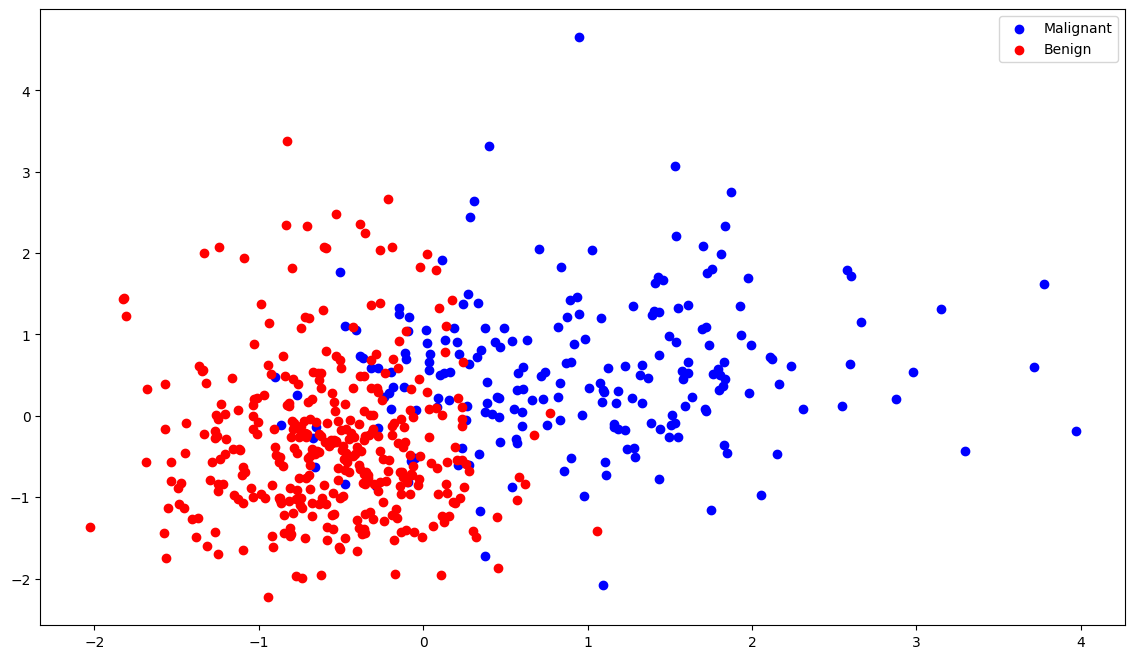

In [7]:
plt.figure(figsize=(14,8))
plt.scatter(X[Y == 0][:, 0], X[Y == 0][:, 1], color='b', label='Malignant')
plt.scatter(X[Y == 1][:, 0], X[Y == 1][:, 1], color='r', label='Benign')
plt.legend();

In [8]:
class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
    
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        # weights initialization
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
            
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            loss = self.__loss(h, y)
                
            if(self.verbose ==True and i % 10000 == 0):
                print(f'loss: {loss} \t')
    
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X):
        return self.predict_prob(X).round()

In [9]:
model = LogisticRegression(lr=0.1, num_iter=300000)

In [10]:
model.fit(X_train, Y_train)

In [11]:
preds = model.predict(X_test)

In [12]:
accuracy = accuracy_score(Y_test, preds)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(Y_test,preds))
cm= confusion_matrix(Y_test,preds) 
print("Confusion Matrix:\n",cm)

Accuracy: 0.91
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.86      0.88        43
           1       0.92      0.94      0.93        71

    accuracy                           0.91       114
   macro avg       0.91      0.90      0.91       114
weighted avg       0.91      0.91      0.91       114

Confusion Matrix:
 [[37  6]
 [ 4 67]]


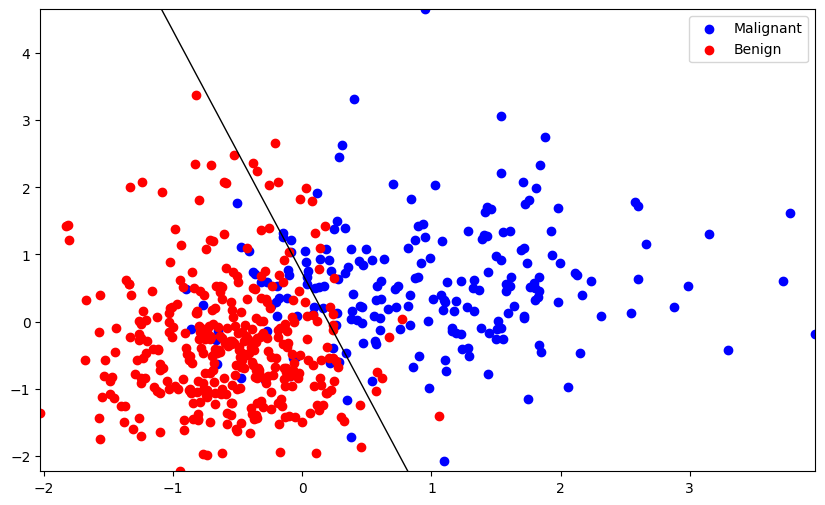

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(X[Y == 0][:, 0], X[Y == 0][:, 1], color='b', label='Malignant')
plt.scatter(X[Y == 1][:, 0], X[Y == 1][:, 1], color='r', label='Benign')
plt.legend()
x1_min, x1_max = X[:,0].min(), X[:,0].max(),
x2_min, x2_max = X[:,1].min(), X[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = model.predict_prob(grid).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='black');